# Week 5 Solutions

*Make sure that you work on these exercises and then submit a screenshot of your work to the appropriate assignment page in Canvas.*

___

### Seattle Public Library Data

This week, we will be working with [circulation data](https://data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6) made publicly available by the Seattle Public Library.

For more information about this dataset, see the Seattle Public Library's [data portal](https://data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6).

___

Our goals in this notebook:
1. First, we want to explore and clean the dataset. What are the overall trends and patterns here?
2. Then, we want to ask some specific questions. Which characters speak the most and least in the entire dataset?
3. Finally, we want to ask: Can we identify and plot the top 20 movies with the most male vs female dialogue?

## Import Libraries

To use the Pandas library, we first need to `import` it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Change Display Settings

By default, Pandas will display 60 rows and 20 columns. I often change [Pandas' default display settings](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) to show more rows or columns.

In [2]:
pd.options.display.max_rows = 2000

## Get Data

In [3]:
spl_df = pd.read_csv("SPL-Sample-Data.csv")

This creates a Pandas [DataFrame object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#DataFrame) — often abbreviated as *df*, e.g., *slave_voyages_df*. A DataFrame looks and acts a lot like a spreadsheet. But it has special powers and functions that we will discuss in the next few lessons.

## Overview

To come up with a good question, you first have to know what's in this dataset. To find out, use the tools that we've learned.

Examine random rows in the DataFrame

In [5]:
spl_df.sample(10)

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,ISBN,Creator,Subjects,Publisher,PublicationYear
10034,Physical,Horizon,BOOK,2015,1,11,"The hobbit, or, There and back again / J.R.R. ...",NaN,"Tolkien, J. R. R. (John Ronald Reuel), 1892-1973",Fantasy Fiction,"Houghton Mifflin,",1984.
55027,Physical,Horizon,BOOK,2011,2,2,Ma jie. I-II. [Ma jie tuan] / Tuo Erjin zhu ; ...,NaN,"Tolkien, J. R. R. (John Ronald Reuel), 1892-1973","Baggins Frodo Fictitious character Fiction, Mi...","Lian jing chu ban shi ye gong si,",1998.
43696,Physical,Horizon,BOOK,2006,5,1,Twilight boy,NaN,NaN,"Mystery and detective stories, Horses Fiction,...",NaN,NaN
38532,Physical,Horizon,VIDEODISC,2022,10,3,"Kamp Koral: SpongeBob's under years. Season 1,...",NaN,NaN,SpongeBob SquarePants Fictitious character Juv...,"Paramount Home Entertainment,",[2022]
11307,Digital,Freegal,SONG,2015,5,1,Twilight Zone (Roadkill Remix),NaN,"2 Unlimited,J. Mark Andrus",NaN,NaN,NaN
4672,Physical,Horizon,SOUNDDISC,2013,8,14,Harry Potter and the chamber of secrets [sound...,NaN,"Rowling, J. K.","Wizards Juvenile fiction, Magic Juvenile ficti...","Random House Audio,",p1999.
50778,Physical,Horizon,VIDEODISC,2009,7,23,SpongeBob SquarePants SpongeBobs Pest of the west,NaN,NaN,"Baths Fiction, Heroes Fiction, Video recording...",NaN,NaN
16840,Digital,OverDrive,EBOOK,2017,3,18,Harry Potter and the Order of the Phoenix: Har...,NaN,J.K. Rowling,"Juvenile Fiction, Juvenile Literature",Pottermore,2012
22852,Physical,Horizon,BOOK,2018,8,10,Twilight / Erin Hunter.,NaN,"Hunter, Erin","Cats Juvenile fiction, Badgers Juvenile fictio...","HarperCollins,",2006.
9665,Physical,Horizon,VIDEODISC,2014,12,1,Twilight,NaN,NaN,"Private investigators Drama, Murder Investigat...",NaN,NaN


Generate information about all the columns in the data (such as the data types for each column)

In [7]:
spl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59207 entries, 0 to 59206
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   UsageClass       59207 non-null  object
 1   CheckoutType     59207 non-null  object
 2   MaterialType     59207 non-null  object
 3   CheckoutYear     59207 non-null  int64 
 4   CheckoutMonth    59207 non-null  int64 
 5   Checkouts        59207 non-null  int64 
 6   Title            59207 non-null  object
 7   ISBN             3723 non-null   object
 8   Creator          42955 non-null  object
 9   Subjects         58437 non-null  object
 10  Publisher        49613 non-null  object
 11  PublicationYear  48890 non-null  object
dtypes: int64(3), object(9)
memory usage: 5.4+ MB


Generate descriptive statistics for all the columns in the data 

In [6]:
spl_df.describe(include='all')

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,ISBN,Creator,Subjects,Publisher,PublicationYear
count,59207,59207,59207,59207.000000,59207.000000,59207.000000,59207,3723,42955,58437,49613,48890
unique,2,4,17,NaN,NaN,NaN,1739,567,557,1055,367,175
top,Physical,Horizon,BOOK,NaN,NaN,NaN,Twilight,9781781100769,"Rowling, J. K.","Juvenile Fiction, Juvenile Literature",Pottermore,2012
freq,34214,34214,18996,NaN,NaN,NaN,335,11,4521,3683,4332,4009
mean,NaN,NaN,NaN,2014.784755,6.501461,9.001976,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,4.894017,3.478794,23.780049,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2005.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2011.000000,3.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2015.000000,7.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2019.000000,10.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN


Use a function to count how many times each tile or creator appears

In [8]:
spl_df['Title'].value_counts()

Twilight                                                                                                                                                                                                                                                                                                                                                            335
Twilight / Stephenie Meyer.                                                                                                                                                                                                                                                                                                                                         301
Harry Potter and the deathly hallows / by J.K. Rowling ; illustrations by Mary GrandPré.                                                                                                                                                                                                

## Research Question

Based on what you've seen in the data, come up with a question that you want to answer. You can focus on one author or title — or, more interestingly, you can compare multiple authors or titles!

Do *Lord of the Rings* checkouts spike when the Amazon show debuted? Are people still reading *Harry Potter*? Did people watch more or less *Spongebob* during lockdown? Which author has more checkouts — Sally Rooney or Suzanne Collins?

**Your question here:** 

## Filter with `.contains()`

Now you're going to filter this data to focus on the categories that you're interested in. We can use the `.str.contains()` to search for particular words or phrases in a column.  

*Note that `case=False` will ignore case and `na=False` will ignore NaN values*

In [10]:
your_filter = spl_df['Title'].str.contains('harry potter', case=False, na=False)

In [11]:
your_filter2 = spl_df['Title'].str.contains('hunger games', case=False, na=False)

In [12]:
spl_df[your_filter]

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,ISBN,Creator,Subjects,Publisher,PublicationYear
2,Physical,Horizon,SOUNDDISC,2012,5,2,Harry Potter and the prisoner of Azkaban [soun...,NaN,"Williams, John, 1932-",Motion picture music,"Nonesuch,",p2004.
4,Physical,Horizon,SOUNDDISC,2012,5,6,Harry Potter and the sorcerer's stone [sound r...,NaN,"Williams, John, 1932-","Motion picture music, Orchestral music","Warner Sunset/Nonesuch/Atlantic,",p2001.
8,Digital,OverDrive,EBOOK,2012,5,1,Charmed Knits: Projects for Fans of Harry Potter,NaN,Alison Hansel,"Crafts, Nonfiction","John Wiley & Sons, Inc.",2007
10,Physical,Horizon,SOUNDDISC,2012,5,9,"Harry Potter and the deathly hallows, part 2 [...",NaN,"Desplat, Alexandre",Motion picture music,"WaterTower Music,",p2011.
12,Digital,OverDrive,AUDIOBOOK,2012,5,2,"Harry, a History: The True Story of a Boy Wiza...",NaN,Melissa Anelli,"Nonfiction, Reference","Tantor Media, Inc",2009
...,...,...,...,...,...,...,...,...,...,...,...,...
59184,Physical,Horizon,BOOK,2012,5,1,Storybook travels : from Eloise's New York to ...,NaN,"Bates, Colleen Dunn","Children Travel Guidebooks, Literary landmarks...","Three Rivers Press,",c2002.
59193,Physical,Horizon,BOOK,2012,5,6,The unofficial Harry Potter cookbook : from ca...,NaN,"Bucholz, Dinah","Cooking English, Potter Harry Fictitious chara...","Adams Media,",2010.
59201,Physical,Horizon,BOOK,2012,5,26,Harry Potter and the goblet of fire / by J.K. ...,NaN,"Rowling, J. K.","Wizards Juvenile fiction, Magic Fiction, Schoo...","Arthur A. Levine Books,",2000.
59202,Digital,OverDrive,EBOOK,2012,5,9,Harry Potter and the Chamber of Secrets: Harry...,NaN,J.K. Rowling,"Juvenile Fiction, Juvenile Literature",Pottermore,2012


In [13]:
dataframe1 = spl_df[your_filter]

In [14]:
dataframe2 = spl_df[your_filter2]

## Make a Plot of SPL Checkouts By Year

Now you need to calculate the total number of SPL checkouts for your categories per year. Then you need to plot the results as a line plot. Make sure to give the plot a compelling and attention-grabbing title.

*Note: if you include code for 2 different plots in the same cell, it should conveniently plot them one on top of the other (very useful if you want to compare authors or titles).*

<AxesSubplot:title={'center':'Harry Potter v. Hunger Games'}, xlabel='CheckoutYear'>

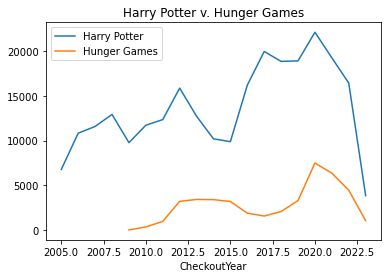

In [19]:
dataframe1.groupby('CheckoutYear')['Checkouts'].sum().plot(kind='line', label = "Harry Potter", title = "Harry Potter v. Hunger Games", legend = True)
dataframe2.groupby('CheckoutYear')['Checkouts'].sum().plot(kind='line', label = "Hunger Games", legend = True)

#plt.xlim([2018, 2022])

When you're done, drop the image (or copy and paste) into Discord and Canvas

## Combine Columns and Convert to Date

Add "CheckoutYear" and "CheckoutMonth" together (to do so, you will need to convert both columns to string data)

In [20]:
spl_df['CheckoutYear'].astype(str) + '-' + spl_df['CheckoutMonth'].astype(str)

0        2012-5
1        2012-5
2        2012-5
3        2012-5
4        2012-5
          ...  
59202    2012-5
59203    2012-5
59204    2012-5
59205    2012-5
59206    2012-5
Length: 59207, dtype: object

Now let's make a new column with the check out year and month combined.

In [21]:
spl_df['CheckoutYearMonth'] = spl_df['CheckoutYear'].astype(str) + '-' + spl_df['CheckoutMonth'].astype(str)

To explicitly make this column into datetime data, we need to use `pd.to_datetime(format=%Y-%m)` and specify the date format of our inputs (here are the [codes for datetime formatting](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)).

In [22]:
pd.to_datetime(spl_df['CheckoutYearMonth'], format='%Y-%m')

0       2012-05-01
1       2012-05-01
2       2012-05-01
3       2012-05-01
4       2012-05-01
           ...    
59202   2012-05-01
59203   2012-05-01
59204   2012-05-01
59205   2012-05-01
59206   2012-05-01
Name: CheckoutYearMonth, Length: 59207, dtype: datetime64[ns]

Let's make a new column "Date"

In [23]:
spl_df['Date'] = pd.to_datetime(spl_df['CheckoutYearMonth'], format='%Y-%m')

## Make a Plot of SPL Checkouts By Month

Now re-do the manipulation and plotting work that you did before, this time using the month information. How does visualizing the pattern by month change your understanding of the phenomenon, if at all?

In [26]:
dataframe1 = spl_df[your_filter]

In [27]:
dataframe2 = spl_df[your_filter2]

<AxesSubplot:title={'center':'Harry Potter v. Hunger Games'}, xlabel='Date'>

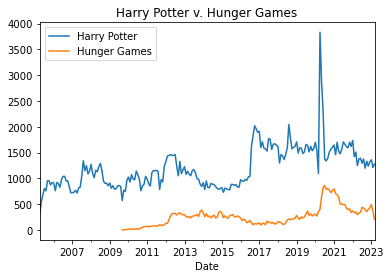

In [28]:
dataframe1.groupby('Date')['Checkouts'].sum().plot(kind='line', label = "Harry Potter", title = "Harry Potter v. Hunger Games", legend = True)
dataframe2.groupby('Date')['Checkouts'].sum().plot(kind='line', label = "Hunger Games", legend = True)

#plt.xlim([2018, 2022])